## Importing library and loading processed data

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from sklearn.model_selection import GridSearchCV

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel



import spacy
nlp = spacy.load('en_core_web_sm')
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\matplotlib_inline\config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [3]:
from matplotlib import pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import Counter
import plotly.tools as tls
import plotly.graph_objs as go
import base64
import numpy as np
import pandas as pd

import plotly.offline as py
py.init_notebook_mode(connected=True)

%matplotlib inline


In [4]:
df = pd.read_csv(
    'D:\\Projects\\Topic modelling\\Code\\topic_modelling\\data_cleaning\\Amphan_cleaned.csv')


In [5]:
df.head()

,date,id,content,ct,year,month,quarter,week
0,31-12-2020 20:35,1.340000e+18,The year was a tough one with covid and Amphan...,tough wrecking havoc miss single care lunch,2020,12,4,53
1,31-12-2020 20:21,1.340000e+18,Pandemic.Trump impeachment. Joe Biden.Kamala H...,pandemic trump impeachment kamala harry coast ...,2020,12,4,53
2,31-12-2020 20:04,1.340000e+18,@sumonseng @ranjona @kavita_krishnan @sagarika...,sell pronunciation chauvinism rural afflict mo...,2020,12,4,53
3,31-12-2020 19:51,1.340000e+18,"Diamond Princess, Zoom calls\nAir strikes in S...",diamond princess zoom tony henry stock crash m...,2020,12,4,53
4,31-12-2020 17:42,1.340000e+18,Okay...m not going to mention anyone in partic...,mention particular type health actually forward,2020,12,4,53


In [6]:
df.shape

(41120, 8)

In [7]:
text=df.ct.values.tolist()

## Modelling

In [8]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print("="*70)


In [9]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

class LemmaCountVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))


In [10]:
tf_vectorizer = LemmaCountVectorizer(max_df=0.95,
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)


## LDA

In [11]:
lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=10)


In [12]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=10)

In [13]:
# params = {
#     'n_components': [10, 12,15],
#     'learning_decay': [0.75, 0.80, 0.85]
# }

# lda_search = GridSearchCV(lda,
#                           param_grid=params,
#                           cv=3,
#                           return_train_score=False)

# lda_search.fit(tf)

# results = pd.DataFrame(lda_search.cv_results_)


In [14]:
# best_lda_model = lda_search.best_estimator_
# print("Best Model's Params: ", lda_search.best_params_)


In [15]:
lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                learning_decay=0.85,
                                random_state=10)


In [16]:
lda.fit(tf)

LatentDirichletAllocation(learning_decay=0.85, learning_method='online',
                          learning_offset=50.0, max_iter=5, random_state=10)

## Getting our topics from the data using LDA

In [17]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)



Topics in LDA model: 

Topic #0:video picture hear potential dark press congress catch leader big wait prayer aware window ward listen town position baby wonderful terrible beach actual venture light york occidental closely devastating reply bridge group replacement agree lf bear gain search pain comment

Topic #1:minister chief crore prime dead million stock evacuation damage visit assistance coastal leave business situation threat maximum journal travel advance force provide development government area financial panic photo terrify risk infrastructure control room create fund plan rural lie consider homeless

Topic #2:safety water pray electricity soon hope stay house day home area power situation life possible dangerous supply face family lose medium thank devastate damage dear hard care busy post humanity deadly government impact check city tweet loss free village poor

Topic #3:day alert service high declare review depression meeting connection work area power close electricity n

In [20]:
first_topic = lda.components_[7]
second_topic = lda.components_[9]
third_topic = lda.components_[4]
fourth_topic = lda.components_[2]


In [21]:
first_topic.shape


(7126,)

In [22]:
first_topic_words = [tf_feature_names[i]
                     for i in first_topic.argsort()[:-50 - 1:-1]]
second_topic_words = [tf_feature_names[i]
                      for i in second_topic.argsort()[:-50 - 1:-1]]
third_topic_words = [tf_feature_names[i]
                     for i in third_topic.argsort()[:-50 - 1:-1]]
fourth_topic_words = [tf_feature_names[i]
                      for i in fourth_topic.argsort()[:-50 - 1:-1]]


## Visualising our wordcloud for topics

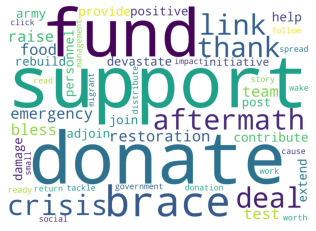

In [23]:
from wordcloud import WordCloud
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

firstcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    width=2500,
    height=1800
).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()


Here the topics are about the aftermath of the super cyclonic disaster that battered the Eastern Indian coast.  People are in need of assistance, need support, their supplies are exhausted and the situation has worsen.
<!-- Here the topics is about the coverage/forecasting done by the different organisation during different time of disasters.
<!-- Here people were questioning the govt about funds, politics happening due to funds related issue like corruption, poeple were concerned about the funds not being able to reach them in the time of a disaster event. People are in immediate need of assistance -->
<!-- 
Here the talk is happening about survey conducted by the governement,people were questioning the govt about funds, politics happening due to funds related issue like corruption, poeple were concerned about the funds not being able to reach them in the time of a disaster event --> 

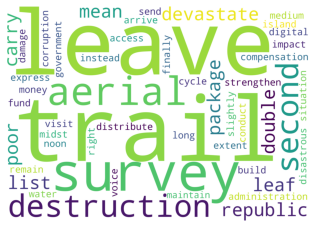

In [24]:
secondcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    width=2500,
    height=1800
).generate(" ".join(second_topic_words))
plt.imshow(secondcloud)
plt.axis('off')
plt.show()


Here the talk is happening about survey conducted by the governement,people were questioning the govt about funds, politics happening due to funds related issue like corruption, poeple were concerned about the funds not being able to reach them in the time of a disaster event
<!-- People here are seen talking about the events happening before the cyclone strikes and after its occurence like evacuation of people, damage caused,etc. Basic necessities like electricity,clean fresh drinking water,cell services,stc are unavailable. Different modes of people has been suspended. People are helping each others affected in the time of crisis. -->

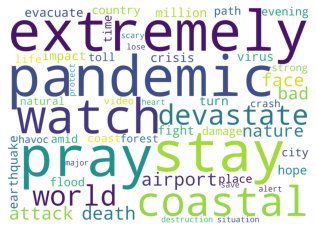

In [25]:
thirdcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    width=2500,
    height=1800
).generate(" ".join(third_topic_words))
plt.imshow(thirdcloud)
plt.axis('off')
plt.show()


Here the topic is about the situation people are in due to the super cyclone. People were left devastated in a situation where one side was super cyclone and other side was the first Wave of Covid pandemic
<!-- Here the talk is about funds where the people are in need in assistance and they are questioning the govt about funds, individual organisation have come in help of people affected and even people are askked to make donation for the affected. -->

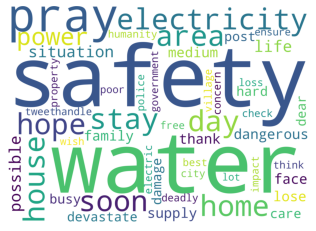

In [26]:
fourthcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    width=2500,
    height=1800
).generate(" ".join(fourth_topic_words))
plt.imshow(fourthcloud)
plt.axis('off')
plt.show()


Here the topic is about the basic day to day supplies that people are missing like water, electricity, etc. Immediate assistance was required. Different modes of trvel was suspended
<!-- Here the talk is happening about survey conducted by the governement,officials and other people and analyzing the impact. Different travelling modes have been hindered and people are unavailable to travel and people are immediate need of assistance -->
<!-- people were questioning the govt about funds, politics happening due to funds related issue like corruption, poeple were concerned about the funds not being able to reach them in the time of a disaster event . -->



## Predict topics for given sentence

In [27]:
df_topic_keywords = pd.DataFrame(lda.components_)


In [28]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in [
                         '-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out


def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    mytext_2 = list(sent_to_words(text))

    mytext_3 = lemmatization(mytext_2, allowed_postags=[
                             'NOUN', 'ADJ', 'VERB', 'ADV'])

    mytext_4 = tf_vectorizer.transform(mytext_3)

    topic_probability_scores = lda.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(
        topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores





In [29]:
mytext = ["Feared from cyclone"]
topic, prob_scores = predict_topic(text=mytext)


In [30]:
lda_output = lda.transform(tf)


## Cluster documents that share same topic and similar topics

In [31]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=10, random_state=100).fit_predict(lda_output)

svd_model = TruncatedSVD(n_components=2)  
lda_output_svd = svd_model.fit_transform(lda_output)

x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

print("Component's weights: \n", np.round(svd_model.components_, 2))

print("Perc of Variance Explained: \n", np.round(
    svd_model.explained_variance_ratio_, 2))


Component's weights: 
 [[ 0.16  0.24  0.44  0.31  0.57  0.22  0.15  0.35  0.26  0.22]
 [-0.03 -0.08 -0.58 -0.16  0.76 -0.04 -0.03 -0.19 -0.05 -0.06]]
Perc of Variance Explained: 
 [0.02 0.22]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

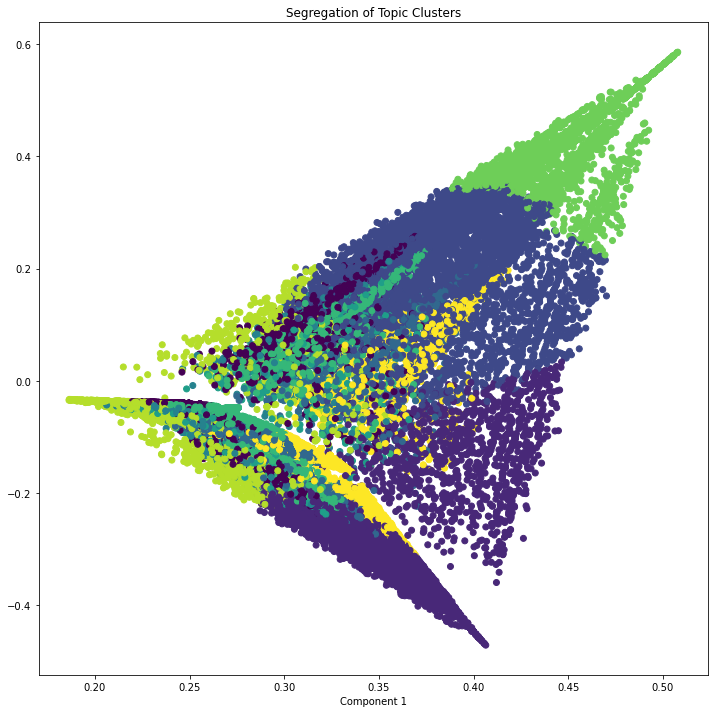

In [32]:
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )
